# Ejercicio 3 - guía 8

Repetir el ejercicio 2(c) de la guía de priors conjugados usando grid sampling.

### Desarrollo

Primero que todo paso a recordar el enunciado del inciso que se indica:

**"Se tira la moneda 10 veces y se obtienen menos de 3 caras (no sabemos cuantas, solo que son
menos de 3). Obtener la distribución posterior para 𝜃."**

También hay que recordar el prior propuesto para este modelo sigue una distribución **Beta(𝜃 |4, 4)**.

Ahora paso a desarrollar el modelo, primero armo la grilla de valores para theta:

In [1]:
import numpy as np 

grilla_theta = np.linspace(0, 1, 1000)

Y aquí entra lo interesante del ejercicio, la likelihood no es una cualquiera sino que es condicional dado los 3 casos posibles que nos quedan:

* Dado que no obtuvimos ninguna cara
* Dado que obtuvimos una sola cara
* Dado que obtuvimos 2 caras

Paso a armar eso en el código:

In [2]:
from scipy.stats import binom

n_tiradas = 10
caras_posibles = [0, 1, 2]
likelihood = np.zeros_like(grilla_theta)

for cara in caras_posibles:
    likelihood += binom.pmf(cara, n_tiradas, grilla_theta)

Ahora armo el prior y normalizo para obtener la posterior:

In [6]:
from scipy.stats import beta

prior = beta.pdf(grilla_theta, 4, 4)

posterior = likelihood * prior   

posterior /= np.trapz(posterior, grilla_theta)

Y finalmente, observo el gráfico de la posterior obtenida:

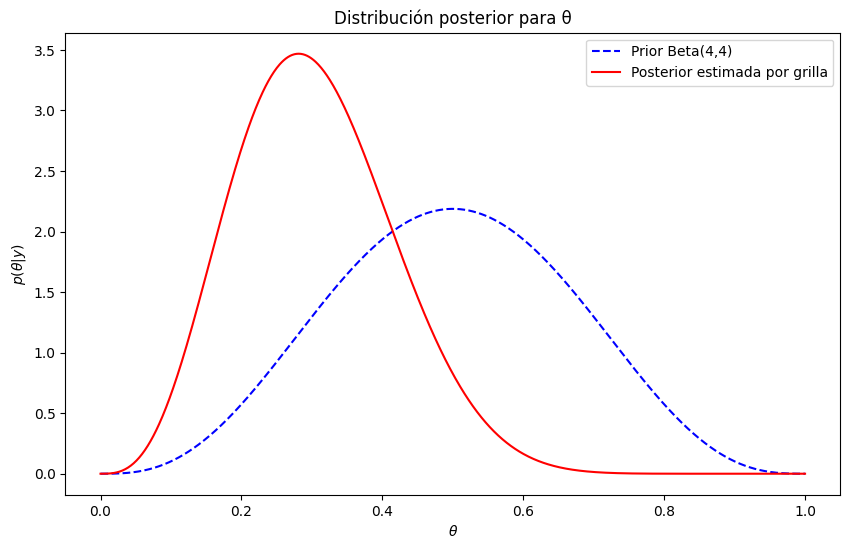

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grilla_theta, prior, label="Prior Beta(4,4)", color="blue", linestyle="--")
plt.plot(grilla_theta, posterior, label="Posterior estimada por grilla", color="red")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta|y)$')
plt.title("Distribución posterior para θ")
plt.legend()
plt.show()